Perceptrons using Pytorch

In [0]:
import torch
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
import torch.nn as nn

Step1: Generate a dataset of 100 points

In [0]:
n_pts=100
centres=[[-0.5,0.5],[0.5,-0.5]]
X,y=datasets.make_blobs(n_samples=n_pts,random_state=13,centers=centres,cluster_std=0.4)  
X_data=torch.Tensor(X)    # convert to tensors
y_data=torch.Tensor(y.reshape(100,1))

The dataset generated will have a standard deviation of 0.4 and centres as mentioned above.

In [73]:
print(X_data)
print(y_data)

tensor([[-1.1556e+00,  3.8875e-01],
        [-7.8496e-01,  8.0151e-01],
        [-8.0745e-01,  7.9167e-01],
        [ 1.9701e-01, -7.0433e-01],
        [ 7.8137e-02, -8.9108e-01],
        [ 9.7161e-01, -9.3044e-01],
        [ 6.4054e-01, -1.8457e-01],
        [ 8.0188e-01, -8.0395e-01],
        [-3.1874e-01,  3.6693e-01],
        [ 2.8137e-01, -3.8319e-01],
        [-4.2602e-01,  2.3958e-01],
        [-6.7486e-01,  7.1917e-01],
        [-8.4166e-01,  6.8626e-01],
        [ 5.3235e-01, -1.4279e+00],
        [-3.5619e-01,  2.9521e-01],
        [-2.4405e-01,  1.3215e+00],
        [-4.1302e-01,  7.0573e-01],
        [ 1.4700e-01, -7.6425e-01],
        [-6.5378e-01,  2.8787e-01],
        [ 5.2920e-01, -5.9602e-01],
        [ 6.4401e-01, -6.7528e-01],
        [-1.1887e-01,  6.5127e-02],
        [ 1.0076e+00, -3.9710e-01],
        [-1.3450e-01,  6.2694e-01],
        [-5.8294e-01,  3.4963e-01],
        [ 4.8974e-01, -8.8362e-01],
        [ 9.3199e-02, -7.1080e-01],
        [ 5.9133e-01, -7.701

In [0]:
y_data=torch.Tensor(y.reshape(100,1))  # reshape the data as it might cause an issue while training the model

In [75]:
print(y_data)

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
      

The below function displays the dataset in form of graph. **The blue points represent label 0 and green points represent label 1**

In [0]:
def scatter_plot():
  plt.scatter(X[y==0,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])
  

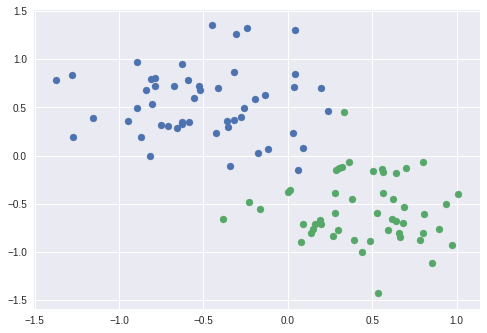

In [77]:
scatter_plot()

Step2: Define the Model

In [0]:
class Model(nn.Module):
  def __init__(self,input_size,output_size):   # Defines the constructor of the model
    super().__init__()                         # Inherits the super class i.e nn.Module
    self.linear=nn.Linear(input_size,output_size) # Performs Linear transformation on data 
  def forward(self,x):                      # Detemine the predicted y value usinf sigmoid activation function
    pred=torch.sigmoid(self.linear(x))       # here the sigmoid function is applied to convert the value to probability
    return pred
  def predict(self,x):                       # predicts the outcome for the given input
    pred=self.forward(x)
    if pred>=0.5:
      return 1
    else:
      return 0

In [79]:
torch.manual_seed(1)                        
model=Model(2,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.3643, -0.3121]], requires_grad=True), Parameter containing:
tensor([-0.1371], requires_grad=True)]


Here we define an object of Model of 2 input and 3 output size. the parameters of the odels can be accessed usind .parameters() function

In [0]:
[w,b]=model.parameters()
w1,w2=w.view(2)
b1=b[0]
def get_params():    # This function will return the two weights and bias of the model
  return (w1.item(),w2.item(),b1.item())

In [0]:
def plot_fit(title):                 # This function plots the classification line using the initial randomly selected model parameters
  plt.title(title)
  w1,w2,b1=get_params()
  x1=np.array([-2.0,2.0])
  x2=(w1*x1+b1)/-w2  # we know the equation of line is w1x1+w2x2+b=0
  plt.plot(x1,x2,'r')
  scatter_plot()
  plt.show()

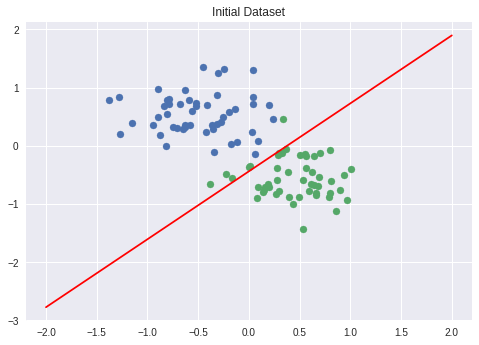

In [82]:
 plot_fit("Initial Dataset")

In the above graph we can see that the classification line does not properly classify the blue and green points. Lets train the dataset using loss functions and optimiser

Step 3: Train the Model

In [0]:
criteria=nn.BCELoss()  #  A criterion that measures the Binary Cross Entropy between the target and the output
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)     # Implements stochastic gradient descent. The main job is to update the parameters

To Train the Model :
1. Set the number of epochs. One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
2. Calculate y_predict using the forward function of the model.
3. The error loss can be calculated using cross entrophy
4. Append the losses to a list.
5. Set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes.
6. loss.backward() computes dloss/dx for every parameter x which has requires_grad=True. These are accumulated into x.grad for every parameter x. i.e x.grad += dloss/dx
7. optimizer.step updates the value of x using the gradient x.grad. For example, the SGD optimizer performs: x += -lr * x.grad. 

In [63]:
epochs=1000
losses=[]
for i in range(epochs):
  y_pred=model.forward(X_data)
  loss=criteria(y_pred,y_data)
  print("Epoch: ",i,"Loss: ", loss)
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:  0 Loss:  tensor(0.5416, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  1 Loss:  tensor(0.5407, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  2 Loss:  tensor(0.5399, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  3 Loss:  tensor(0.5391, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  4 Loss:  tensor(0.5382, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  5 Loss:  tensor(0.5374, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  6 Loss:  tensor(0.5366, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  7 Loss:  tensor(0.5358, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  8 Loss:  tensor(0.5349, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  9 Loss:  tensor(0.5341, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  10 Loss:  tensor(0.5333, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  11 Loss:  tensor(0.5325, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  12 Loss:  tensor(0.5317, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  13 Loss:  tensor(0.5309, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  14 Loss:

The below graphs shows us how the losses reduce as the number of epoch increases.

Text(0, 0.5, 'Losses')

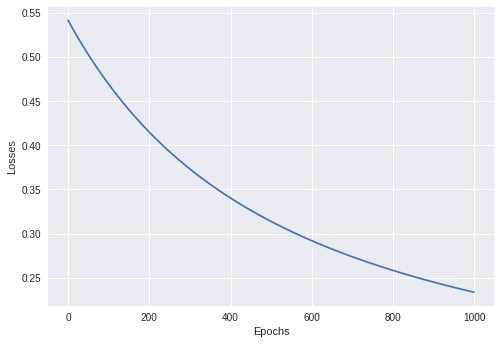

In [85]:
plt.plot(range(epochs),losses)
plt.xlabel("Epochs")
plt.ylabel("Losses")

The below graph displays the perfectly fit classification model

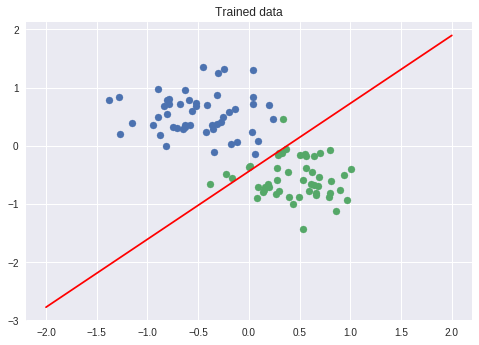

In [87]:
plot_fit("Trained data")

Step5: Predict the values

Here we have defines two points namely point1 and point2. We can see from the graph that the red point is belongs to the label 1 (or class green). Here the probability that the red point belongs to the label 1 is calculated using forward and the probability is thus predicted to be 1. 

Red point positive probability= 0.6316651105880737
Black point positive probability= 0.3071390986442566
Red point positive probability= 1
Black point positive probability= 0


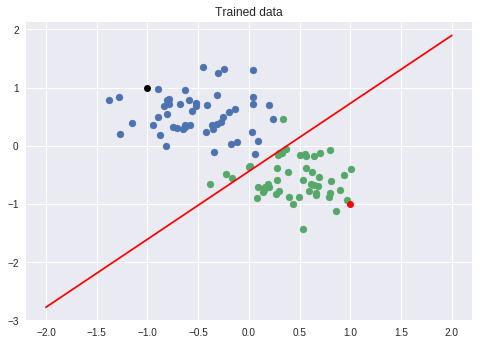

In [88]:
point1=torch.Tensor([1.0,-1.0])
point2=torch.Tensor([-1.0,1.0])
plt.plot(point1.numpy()[0],point1.numpy()[1],'ro')
plt.plot(point2.numpy()[0],point2.numpy()[1],'ko')
print("Red point positive probability=",model.forward(point1).item())
print("Black point positive probability=",model.forward(point2).item())
print("Red point positive probability=",model.predict(point1))
print("Black point positive probability=",model.predict(point2))
plot_fit("Trained data")

In [0]:
a